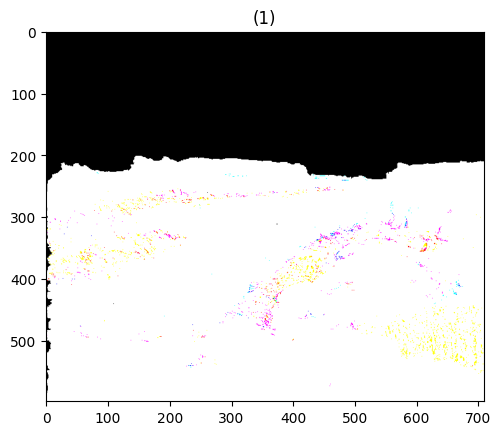

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [18]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
from Common_Functions.CommonFunctions import *

def segement(image):


    # initialize the mask
    mask = np.zeros(image.shape[:2], np.uint8)

    # not sure what these are for in the algorithm
    backgroundModel = np.zeros((1, 65), np.float64) 
    foregroundModel = np.zeros((1, 65), np.float64) 


    img_height=image.shape[0]
    img_width= image.shape[1]
   

   # initialize a rectangle for the grabcut algorithm
    rectangle = (1,1,img_width,img_height)

    # run the grabcut algorithm for 8 iterations
    cv2.grabCut(image, mask, rectangle, backgroundModel, foregroundModel, 10, cv2.GC_INIT_WITH_RECT) 
   

    # generate the forground mask
    mask_forground = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 

    # get the final image
    result_img = image * mask_forground[:, :, np.newaxis] 

 
    result_mask = np.where((result_img>0),1,0).astype(float)

    return result_mask

img1 = io.imread('../imgs/c2.jpeg')
segement(img1)
